<a href="https://colab.research.google.com/github/stutigarg1/Pixel-Perfect/blob/main/Lab_9_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = "/content/lights.JPG"  # Use the correct path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [15]:
# Check if the image was loaded successfully
if image is None:
    print("Error: Image not found or unable to load.")
else:
    # Step 1: Apply FFT to convert the image to the frequency domain
    f = np.fft.fft2(image)               # Compute the 2D FFT of the image
    fshift = np.fft.fftshift(f)           # Shift the zero frequency component to the center
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  # Calculate the magnitude spectrum

    # Step 2: Create a low-pass filter mask
    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2   # Center of the image

    # Create a mask with a circular low-pass filter
    radius = 50  # Radius of the low-pass filter
    mask = np.zeros((rows, cols), np.uint8)
    cv2.circle(mask, (ccol, crow), radius, 1, thickness=-1)  # 1 inside circle, 0 outside

    # Apply the mask to the shifted FFT
    fshift_filtered = fshift * mask

    # Step 3: Inverse FFT to get the filtered image back in the spatial domain
    f_ishift = np.fft.ifftshift(fshift_filtered)  # Inverse shift
    filtered_image = np.fft.ifft2(f_ishift)       # Inverse FFT
    filtered_image = np.abs(filtered_image)       # Take the magnitude to get the real part

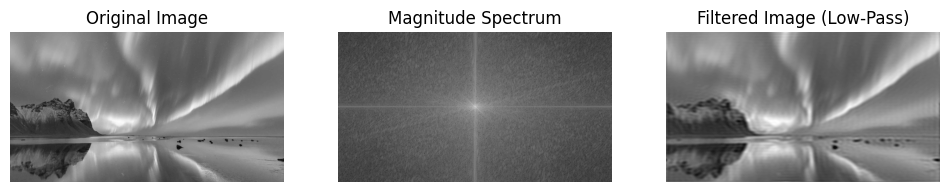

In [14]:
    # Display the results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray')
    plt.title("Original Image"), plt.axis("off")
    plt.subplot(1, 3, 2), plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title("Magnitude Spectrum"), plt.axis("off")
    plt.subplot(1, 3, 3), plt.imshow(filtered_image, cmap='gray')
    plt.title("Filtered Image (Low-Pass)"), plt.axis("off")
    plt.show()

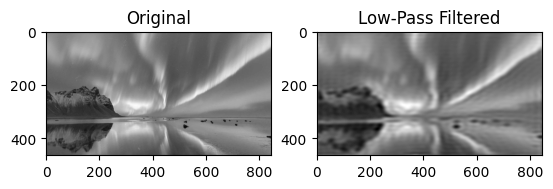

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('/content/lights.JPG', 0)

# FFT and shift
fshift = np.fft.fftshift(np.fft.fft2(image))

# Low-pass filter mask
rows, cols = image.shape
mask = np.zeros((rows, cols), np.uint8)
cv2.circle(mask, (cols // 2, rows // 2), 30, 1, -1)

# Apply filter and inverse FFT
filtered = fshift * mask
img_back = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered)))

# Display result
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(img_back, cmap='gray'), plt.title('Low-Pass Filtered')
plt.show()


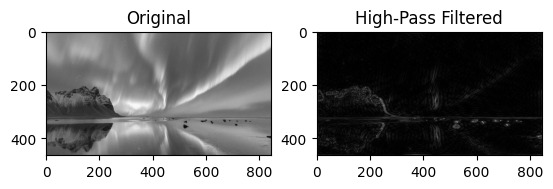

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('/content/lights.JPG', 0)

# FFT and shift
fshift = np.fft.fftshift(np.fft.fft2(image))

# High-pass filter mask
rows, cols = image.shape
mask = np.ones((rows, cols), np.uint8)
cv2.circle(mask, (cols // 2, rows // 2), 30, 0, -1)

# Apply filter and inverse FFT
filtered = fshift * mask
img_back = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered)))

# Display result
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(img_back, cmap='gray'), plt.title('High-Pass Filtered')
plt.show()


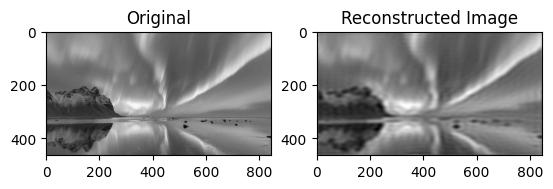

In [9]:
# Apply FFT using np.fft.fft2
fshift = np.fft.fftshift(np.fft.fft2(image))

# Create a low-pass filter mask (example) - Adjust as needed
rows, cols = image.shape
mask = np.zeros((rows, cols), np.uint8)
cv2.circle(mask, (cols // 2, rows // 2), 30, 1, -1)

# Apply mask and inverse FFT
filtered = fshift * mask
img_back = np.fft.ifft2(np.fft.ifftshift(filtered))
img_back = np.abs(img_back)

# Display the results
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(img_back, cmap='gray'), plt.title('Reconstructed Image')
plt.show()


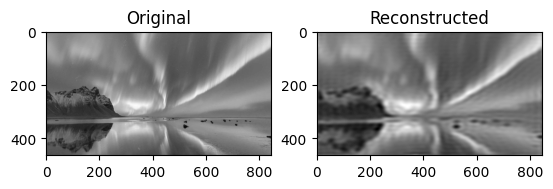

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
image = cv2.imread('/content/lights.JPG', 0)

# FFT and filtering
fshift = np.fft.fftshift(np.fft.fft2(image))
mask = np.zeros_like(image)
cv2.circle(mask, (image.shape[1]//2, image.shape[0]//2), 30, 1, -1)
filtered = fshift * mask

# Inverse FFT to reconstruct
img_back = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered)))

# Display
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(img_back, cmap='gray'), plt.title('Reconstructed')
plt.show()


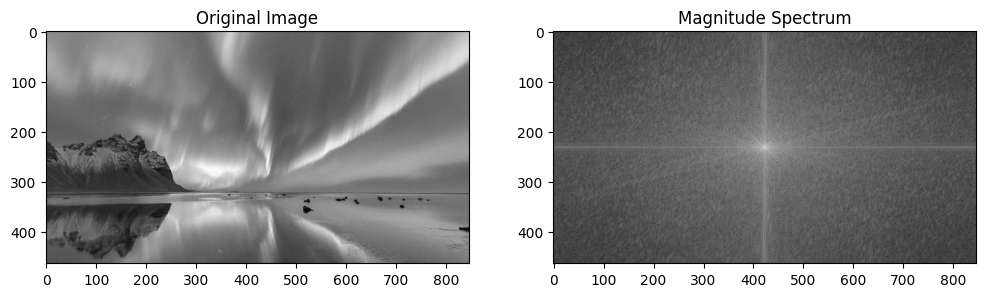

In [11]:
# Load image in grayscale
image = cv2.imread('/content/lights.JPG', 0)  # Replace with your image path

# Apply FFT
f = np.fft.fft2(image)         # Perform FFT
fshift = np.fft.fftshift(f)    # Shift the zero frequency component to the center

# Calculate the magnitude spectrum
magnitude_spectrum = np.log(np.abs(fshift) + 1)  # Use log to scale the values

# Display the original image and the magnitude spectrum
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('Magnitude Spectrum')
plt.show()
